In [1]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def plot_confusion_matrix_1(cf_matrix, title=None):
    class_names=[0,1]  #name of the classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(title + " confusion matrix", y=1.1)
    plt.ylabel('Acutal label')
    plt.xlabel('Predicted label')
    
    
def compute_performace(a, b, title="test"):
    print("\n",title, " performance")
    print(f'Accuracy Score: {metrics.accuracy_score(a,b)}')
    print(f'Area Under Curve: {metrics.roc_auc_score(a, b)}')
    print(f'Recall score: {metrics.recall_score(a,b)}')


(4000, 2)


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


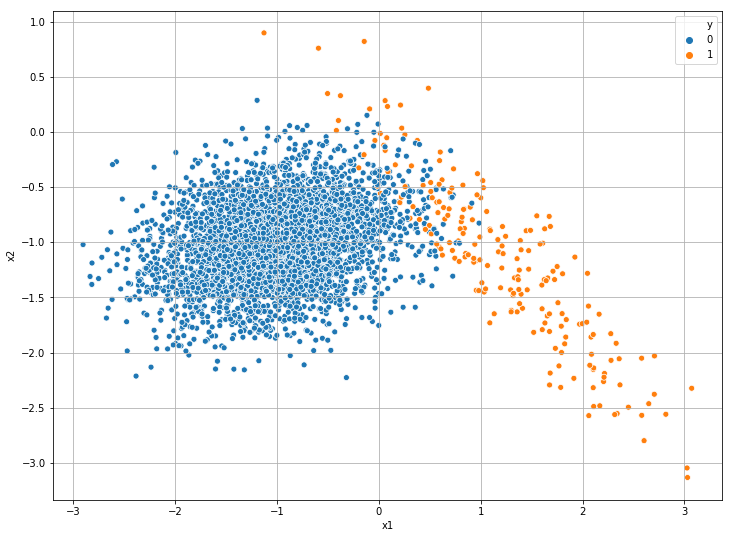

<Figure size 864x648 with 0 Axes>

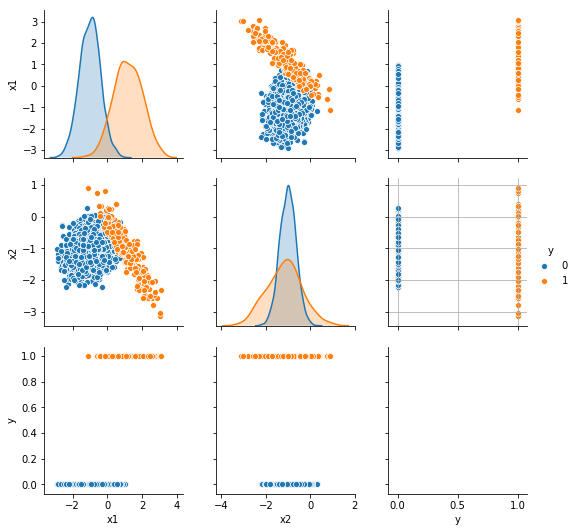

In [3]:
from collections import Counter
from sklearn.datasets import make_blobs, make_classification
# create a imbalanced dataset of 10K with 2 class

N = 4000
ratio = 95 # one class is 95%, the other is 5%

X,y = make_classification(n_samples=N  # number of samples
                          ,n_features=2    # feature/label count
                          ,n_informative=2 # informative features
                          ,n_redundant=0   # redundant features
                          ,n_repeated=0    # duplicate features
                          ,n_clusters_per_class=1  # number of clusters per class; clusters during plotting
                          ,weights=[ratio/100]   # proportions of samples assigned to each class
                          ,flip_y=0.00         # fraction of samples whose class is assigned randomly. 
                          ,random_state=888 )

print(X.shape)

# club together into a dataframe
df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

fig = plt.figure(figsize=(12,9))
sns.scatterplot(data=df,x='x1',y='x2',hue='y')
plt.grid()

fig = plt.figure(figsize=(12,9))
sns.pairplot(df[['x1','x2','y']],hue='y')
plt.grid()


plt.show()

In [4]:
print("percentage(y=0)", len(df.loc[df['y']==0])/len(df))
print("percentage(y=1)", len(df.loc[df['y']==1])/len(df))

Counter(y)

percentage(y=0) 0.95
percentage(y=1) 0.05


Counter({0: 3800, 1: 200})

 # train/test split

In [5]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score

# split dataset into x,y
x = df.drop('y',axis=1)
y = df['y']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=888)


 train  performance
Accuracy Score: 0.9853571428571428
Area Under Curve: 0.9128848193582857
Recall score: 0.8321678321678322

 test  performance
Accuracy Score: 0.9866666666666667
Area Under Curve: 0.9096560298383755
Recall score: 0.8245614035087719


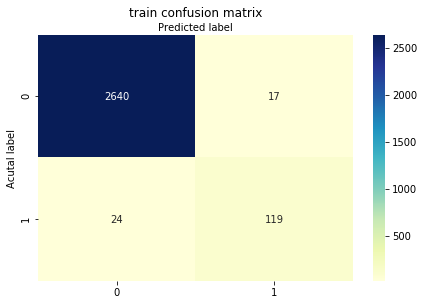

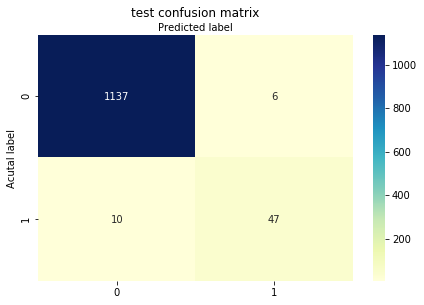

In [6]:
# LogisticRegression model
lg1 = LogisticRegression(random_state=111, class_weight=None, C=1e9)

# fit
lg1.fit(X_train,y_train)

# predict
y_train_pred = lg1.predict(X_train)

# with test data
y_test_pred = lg1.predict(X_test)

# confusion matrix for train and test
cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)


# train
plot_confusion_matrix_1(cf_matrix_train, "train")
compute_performace(y_train, y_train_pred, title="train")

# test
plot_confusion_matrix_1(cf_matrix_test, "test")
compute_performace(y_test, y_test_pred, title="test")

intercept =  [-0.6300811]  coef =  [6.41831377 3.7468084 ]


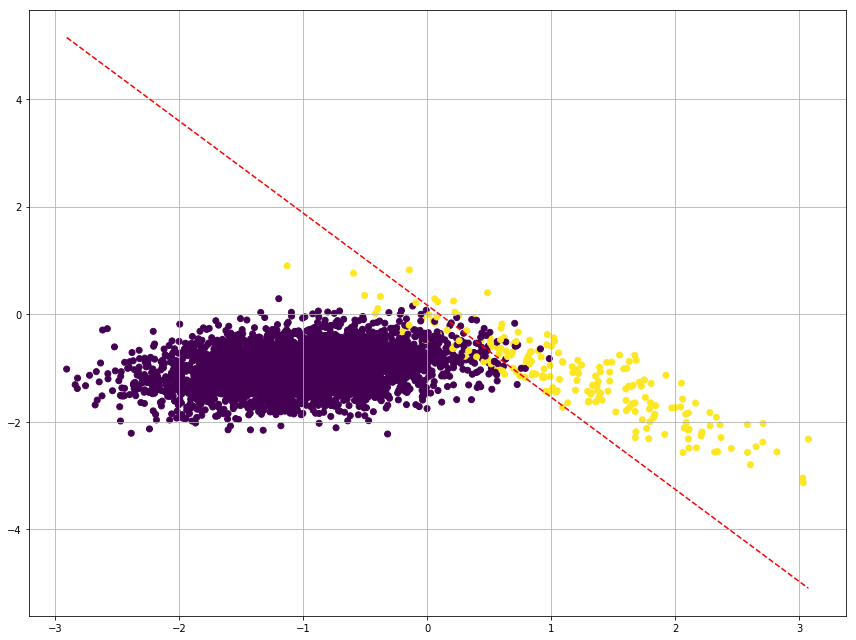

In [7]:
w = lg1.coef_[0]
b = lg1.intercept_

print("intercept = ", b, " coef = ", w)

x_vals = np.linspace(min(df['x1']), max(df['x1']), 100)
y_vals = -(x_vals * w[0] + b[0])/w[1]


fig = plt.figure(figsize=(12,9))
plt.scatter(df['x1'], df['x2'], c=df['y'])

plt.plot(x_vals, y_vals, '--', c="red")
plt.tight_layout()
plt.grid()

# consider the weight of samples


 train  performance
Accuracy Score: 0.9692857142857143
Area Under Curve: 0.9805080128753444
Recall score: 0.993006993006993

 test  performance
Accuracy Score: 0.9691666666666666
Area Under Curve: 0.9838145231846019
Recall score: 1.0


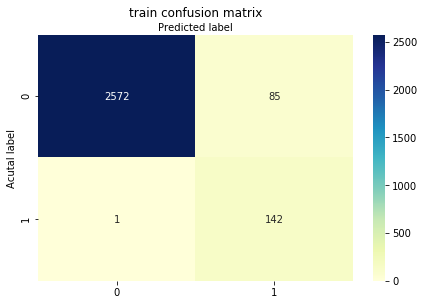

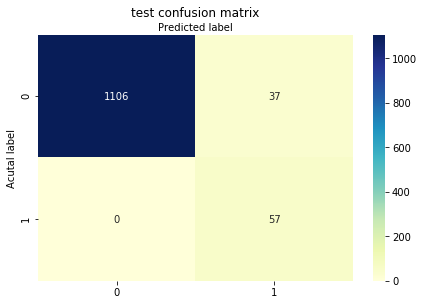

In [8]:
# define class weights
w = {0:ratio, 1:100-ratio}
# define model
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to 
# class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

lg2 = LogisticRegression(random_state=111, class_weight="balanced", C=1e9)

# fit
lg2.fit(X_train,y_train)

# predict
y_train_pred = lg2.predict(X_train)

# with test data
y_test_pred = lg2.predict(X_test)

# confusion matrix for train and test
cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

# train
plot_confusion_matrix_1(cf_matrix_train, "train")
compute_performace(y_train, y_train_pred, title="train")

# test
plot_confusion_matrix_1(cf_matrix_test, "test")
compute_performace(y_test, y_test_pred, title="test")

intercept =  [3.9548848]  coef =  [8.9437197  7.16187093]


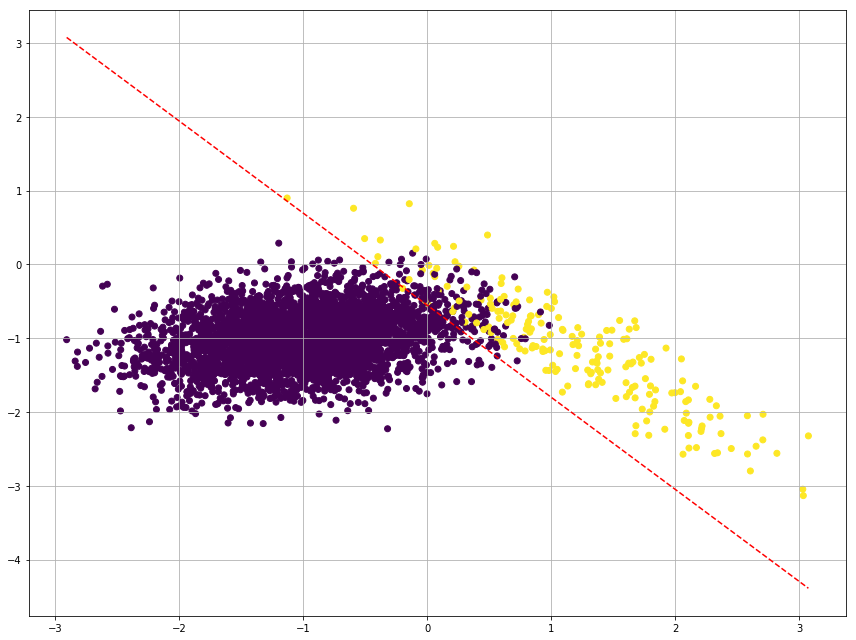

In [9]:
w = lg2.coef_[0]
b = lg2.intercept_

print("intercept = ", b, " coef = ", w)

x_vals = np.linspace(min(df['x1']), max(df['x1']), 100)
y_vals = -(x_vals * w[0] + b[0])/w[1]

fig = plt.figure(figsize=(12,9))
plt.scatter(df['x1'], df['x2'], c=df['y'])

plt.plot(x_vals, y_vals, '--', c="red")
plt.tight_layout()
plt.grid()

# SMOT upsampling technique
## https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [12]:
#! pip install imbalanced-learn

In [13]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'imblearn'

## For minority class, we can see the prediction accuracy has been improved dramatially. However, the model parameters were changed a lot too.

1) Enable sklearn regularization LogisticRegression(C=1e9)

2) add statsmodels intercept sm.Logit(y, sm.add_constant(X)) OR disable sklearn intercept LogisticRegression(C=1e9, fit_intercept=False)

3) sklearn returns probability for each class so model_sklearn.predict_proba(X)[:, 1] == model_statsmodel.predict(X)

4) use of predict function model_sklearn.predict(X) == (model_statsmodel.predict(X) > 0.5).astype(int)

# use stat models

In [ ]:
import statsmodels.api as sm  
import statsmodels.formula.api as smf  # R style formula

lg_sm_1 = sm.Logit(y_train, sm.add_constant(X_train), family = "binomial").fit() 

lg_sm_1.summary()


In [ ]:
y_train_pred = (lg_sm_1.predict(sm.add_constant(X_train))>0.5).astype(int)

y_test_pred  = (lg_sm_1.predict(sm.add_constant(X_test))>0.5).astype(int)

#print(y_train)
#print(y_train_pred)

cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)

cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

# train
plot_confusion_matrix_1(cf_matrix_train, "train")
compute_performace(y_train, y_train_pred, title="train")

# test
plot_confusion_matrix_1(cf_matrix_test, "test")
compute_performace(y_test, y_test_pred, title="test")


# Adding sample weights

In [ ]:
w = [ratio/100, (100-ratio)/100]

lg_sm_2 = sm.Logit(y_train, sm.add_constant(X_train), sample_weight=w, family = "binomial").fit() 

lg_sm_2.summary()

In [ ]:
y_train_pred = (lg_sm_2.predict(sm.add_constant(X_train))>0.5).astype(int)

y_test_pred  = (lg_sm_2.predict(sm.add_constant(X_test))>0.5).astype(int)

#print(y_train)
#print(y_train_pred)

cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)

cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix_1(cf_matrix_train, title="train")
plot_confusion_matrix_1(cf_matrix_test, title="test")

print(f'Accuracy Score: {metrics.accuracy_score(y_test,y_test_pred)}')
print(f'Area Under Curve: {metrics.roc_auc_score(y_test, y_test_pred)}')
print(f'Recall score: {metrics.recall_score(y_test,y_test_pred)}')